In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/val/47/002095_leftImg8bit.png
/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/val/47/000837_leftImg8bit.png
/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/val/47/000897_leftImg8bit.png
/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/val/47/001904_leftImg8bit.png
/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/val/47/000489_leftImg8bit.png
/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/val/47/000175_leftImg8bit.png
/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/val/47/000065_leftImg8bit.png
/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/val/47/000190_leftImg8bit.png
/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/val/47/001784_leftImg8bit.png
/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/val/47/002035_leftImg8bit.png
/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/val/47/000339_leftImg8bit.png
/kaggle/in

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

## Understanding the Data

In [ ]:
example_dir='/kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/0/005506_gtFine_polygons.json'

In [ ]:
example_dir_photo="/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/train/0/005506_leftImg8bit.png"

In [ ]:
with open(example_dir, 'r') as file:
    data = json.load(file)

In [ ]:
objects = data['objects']
for obj in objects:
    if obj['label'] == "road":  # Checking if the label is "road"
        print(f"Label: {obj['label']}")
        print(f"Polygon coordinates: {obj['polygon']}")

Label: road
Polygon coordinates: [[0.0, 575.7222222222222], [208.04273504273505, 539.6752136752136], [727.1196581196581, 567.482905982906], [1279.0, 690.0427350427351], [1279.0, 963.0], [0.0, 963.0], [0.0, 672.534188034188]]
Label: road
Polygon coordinates: [[0.0, 547.9145299145299], [330.6025641025641, 545.8547008547008], [981.508547008547, 573.6623931623932], [1279.0, 702.4017094017094], [1279.0, 963.0], [0.0, 963.0], [0.0, 673.5641025641025], [0.0, 609.7094017094017]]


In [ ]:
image = cv2.imread(example_dir_photo)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Image Analysis
- The polygon of road is not accurate
- It is over lapping with the rest of the objects
- We will create a binary mask such that this is accomodated
![image.png](attachment:1a8eaa57-4400-4741-82ef-cad4b195fe8b.png)

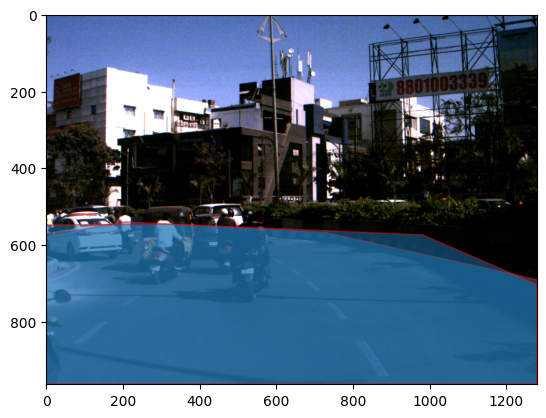

In [ ]:
fig, ax = plt.subplots()
ax.imshow(image)

# Loop over the objects in the JSON data
for obj in data['objects']:
    if obj['label'] == 'road':  # Replace with the label you want, e.g., "road"
        polygon = obj['polygon']

        # Extract x and y coordinates
        x_coords, y_coords = zip(*polygon)

        # Create a polygon patch
        poly_patch = patches.Polygon(xy=list(zip(x_coords, y_coords)), fill=True, edgecolor='r', alpha=0.5)
        ax.add_patch(poly_patch)

# Show the overlaid image
plt.show()

In [ ]:
with open('/kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/102/064400_gtFine_polygons.json', 'r') as file:
    data = json.load(file)

In [ ]:
image = cv2.imread('/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/train/102/064400_leftImg8bit.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

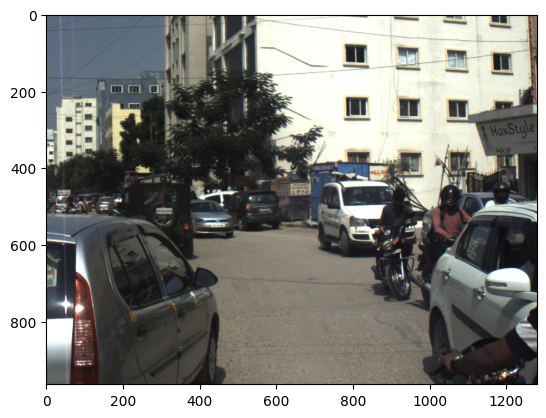

In [ ]:
fig, ax = plt.subplots()
ax.imshow(image)

# Loop over the objects in the JSON data
for obj in data['objects']:
    if obj['label'] == 'vehicle fallback':
        polygon = obj['polygon']

        # Extract x and y coordinates
        x_coords, y_coords = zip(*polygon)

        # Create a polygon patch
        poly_patch = patches.Polygon(xy=list(zip(x_coords, y_coords)), fill=True, edgecolor='r', alpha=0.5)
        ax.add_patch(poly_patch)

# Show the overlaid image
plt.show()

## Creating Masks
- Binary Masks focusing on not Road and Road
- Create_mask_from_json that returns mask

In [ ]:
# import os
# import json
# from PIL import Image, ImageDraw
# import numpy as np

# def create_mask_from_json(json_path, image_size):
#     with open(json_path, 'r') as f:
#         data = json.load(f)

#     # Initialize a blank mask
#     mask = Image.new('L', (data['imgWidth'], data['imgHeight']), 0)

#     # Create a drawing context
#     draw = ImageDraw.Draw(mask)

#     # Flag to check if any 'road' polygons are found
#     road_found = False

#     # Iterate over all objects in the JSON
#     for obj in data['objects']:
#         if obj['label'].lower() == 'road':  # Ensure case-insensitive comparison
#             road_found = True
#             # Extract polygon coordinates and convert to integers
#             polygon = [(int(point[0]), int(point[1])) for point in obj['polygon']]
#             # Draw the polygon on the mask
#             draw.polygon(polygon, outline=1, fill=1)

#     if not road_found:
#         print(f"No 'road' label found in {json_path}")

#     # Resize mask to match the image size if necessary
#     if mask.size != image_size:
#         mask = mask.resize(image_size)

#     return mask

In [ ]:
import os
import json
from PIL import Image, ImageDraw
import numpy as np

# def create_mask_from_json_test(json_path, image_size):
#     with open(json_path, 'r') as f:
#         data = json.load(f)

#     # Initialize a blank mask
#     mask = Image.new('L', (data['imgWidth'], data['imgHeight']), 0)
#     mask_inverse=Image.new('L', (data['imgWidth'], data['imgHeight']), 0)
#     # Create a drawing context
#     draw = ImageDraw.Draw(mask)
#     draw_inverse=ImageDraw.Draw(mask_inverse)


#     # Flag to check if any 'road' polygons are found
#     road_found = False

#     # Iterate over all objects in the JSON
#     for obj in data['objects']:
#         if obj['label'].lower() != 'road':  # Ensure case-insensitive comparison

#             # Extract polygon coordinates and convert to integers
#             polygon_inv = [(int(point[0]), int(point[1])) for point in obj['polygon']]
#             # Draw the polygon on the mask
#             draw_inverse.polygon(polygon_inv, outline=1, fill=1)


#         if obj['label'].lower() == 'road':  # Ensure case-insensitive comparison
#             road_found = True
#             # Extract polygon coordinates and convert to integers
#             polygon = [(int(point[0]), int(point[1])) for point in obj['polygon']]
#             # Draw the polygon on the mask
#             draw.polygon(polygon, outline=1, fill=1)



#     if not road_found:
#         print(f"No 'road' label found in {json_path}")

#     # Resize mask to match the image size if necessary
#     if mask.size != image_size:
#         mask = mask.resize(image_size)
#     if mask_inverse.size != image_size:
#         mask_inverse = mask_inverse.resize(image_size)





#     return np.array(mask),np.array(mask_inverse)

In [ ]:
import os
import json
from PIL import Image, ImageDraw
import numpy as np

def create_mask_from_json(json_path, image_size):
    with open(json_path, 'r') as f:
        data = json.load(f)

    # Initialize a blank mask
    mask = Image.new('L', (data['imgWidth'], data['imgHeight']), 0)
    mask_inverse=Image.new('L', (data['imgWidth'], data['imgHeight']), 0)
    # Create a drawing context
    draw = ImageDraw.Draw(mask)
    draw_inverse=ImageDraw.Draw(mask_inverse)


    # Flag to check if any 'road' polygons are found
    road_found = False

    # Iterate over all objects in the JSON
    for obj in data['objects']:
        if obj['label'].lower() != 'road':  # Ensure case-insensitive comparison

            # Extract polygon coordinates and convert to integers
            polygon_inv = [(int(point[0]), int(point[1])) for point in obj['polygon']]
            # Draw the polygon on the mask
            draw_inverse.polygon(polygon_inv, outline=1, fill=1)
        if obj['label'].lower() == 'road':
            road_found=True





    if not road_found:
        print(f"No 'road' label found in {json_path}")

    # Resize mask to match the image size if necessary

    if mask_inverse.size != image_size:
        mask_inverse = mask_inverse.resize(image_size)



    mask_inv=1-np.array(mask_inverse)

    mask = Image.fromarray(mask_inv.astype(np.uint8) * 255)

    return mask

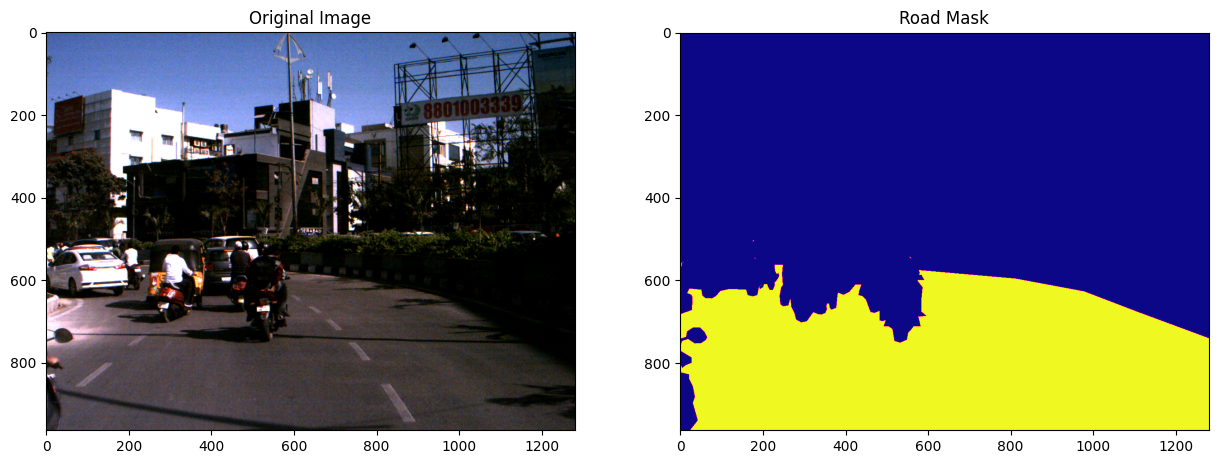

In [ ]:
import matplotlib.pyplot as plt

# Paths to your single example
json_test_path = '/kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/0/005506_gtFine_polygons.json'
image_test_path = '/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/train/0/005506_leftImg8bit.png'

# Create mask
mask = create_mask_from_json(json_test_path, image_size=(1280, 963))  # Replace with actual image size if different

# Open the image
image = Image.open(image_test_path).convert('RGB')

# Convert mask to numpy array for visualization
mask_np=np.array(mask)

# Visualize
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(mask_np, cmap='plasma')
plt.title('Road Mask')

plt.show()

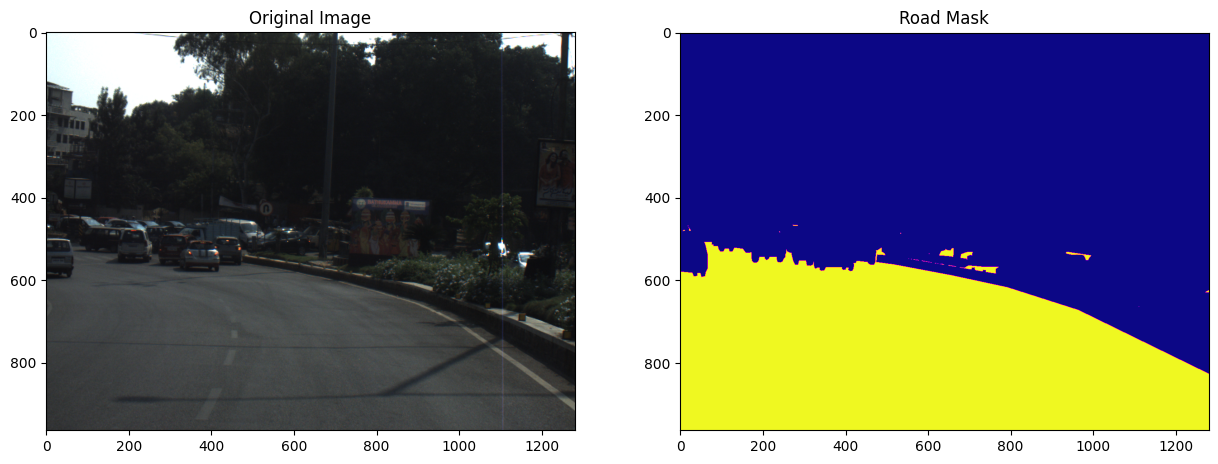

In [ ]:
import matplotlib.pyplot as plt

# Paths to your single example
json_test_path = '/kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/108/028103_gtFine_polygons.json'
image_test_path = '/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/train/108/028103_leftImg8bit.png'

# Create mask
mask = create_mask_from_json(json_test_path, image_size=(1280, 963))  # Replace with actual image size if different

# Open the image
image = Image.open(image_test_path).convert('RGB')

# Convert mask to numpy array for visualization
mask_np = np.array(mask)

# Visualize
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(mask_np, cmap='plasma')
plt.title('Road Mask')

plt.show()

In [ ]:
import cv2

# Path to the image
image_path_mask = '/kaggle/working/idd-segmentation/IDD_Segmentation/masks/train/100/944813_mask.png'
image_path='/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/train/100/944813_leftImg8bit.png'
# Load the image
image_mask = cv2.imread(image_path_mask)
image=cv2.imread(image_path)


if image is not None:
    height, width, channels = image.shape
    print(f"The dimensions of the image are: Width={width}, Height={height}, Channels={channels}")
else:
    print("Image not found or failed to load.")

The dimensions of the image are: Width=1920, Height=1080, Channels=3


[ WARN:0@58.632] global loadsave.cpp:241 findDecoder imread_('/kaggle/working/idd-segmentation/IDD_Segmentation/masks/train/100/944813_mask.png'): can't open/read file: check file path/integrity


## Training and Validation Pipeline for Data Preparation

In [ ]:
from tqdm import tqdm

# Paths to your dataset directories
left_img_dir = '/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/train'
gt_json_dir = '/kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train'

# Output directory for masks
mask_output_dir = '/kaggle/working/idd-segmentation/IDD_Segmentation/masks/train'

os.makedirs(mask_output_dir, exist_ok=True)

In [ ]:
for num_folder in os.listdir("/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/train"):
    num_left_img_dir=os.path.join(left_img_dir,num_folder)
    num_gt_json_dir=os.path.join(gt_json_dir,num_folder)
    num_mask_output_dir = os.path.join(mask_output_dir, num_folder)
    ## num_gt_json_dir example is "/content/drive/MyDrive/Dataset/gtFine/train/7"
    os.makedirs(num_mask_output_dir, exist_ok=True)

    for img_name in tqdm(os.listdir(num_left_img_dir), desc=f'Processing {num_folder}'):
        if img_name.endswith('_leftImg8bit.png'):
            # Construct file paths
            img_path = os.path.join(num_left_img_dir, img_name)
            base_name = img_name.replace('_leftImg8bit.png', '')
            json_name = f'{base_name}_gtFine_polygons.json'
            json_path = os.path.join(num_gt_json_dir, json_name)
            ## json_path example is "/content/drive/MyDrive/Dataset/gtFine/train/7/00576_gtFine_polygons.json"

            mask_name = f'{base_name}_mask.png'
            mask_path = os.path.join(num_mask_output_dir, mask_name)

            image = Image.open(img_path)
            image_size = image.size  # (width, height)

            # Create the mask from JSON
            mask = create_mask_from_json(json_path, image_size)

            # Save the mask
            mask.save(mask_path)

Processing 135:  16%|█▌        | 4/25 [00:00<00:01, 15.95it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/135/576212_gtFine_polygons.json


Processing 135: 100%|██████████| 25/25 [00:01<00:00, 16.24it/s]


No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/135/845304_gtFine_polygons.json


Processing 42:  19%|█▉        | 12/63 [00:00<00:03, 16.64it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/42/148835_gtFine_polygons.json


Processing 38:  67%|██████▋   | 8/12 [00:00<00:00, 18.01it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/38/001339_gtFine_polygons.json


Processing 49:  23%|██▎       | 21/90 [00:01<00:03, 17.52it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/49/563476_gtFine_polygons.json


Processing 49:  56%|█████▌    | 50/90 [00:03<00:02, 15.02it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/49/498709_gtFine_polygons.json


Processing 49:  74%|███████▍  | 67/90 [00:03<00:01, 18.03it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/49/899244_gtFine_polygons.json


Processing 49:  84%|████████▍ | 76/90 [00:04<00:00, 18.21it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/49/497746_gtFine_polygons.json


Processing 101: 100%|██████████| 20/20 [00:01<00:00, 17.38it/s]


No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/101/823323_gtFine_polygons.json


Processing 178:  16%|█▌        | 12/77 [00:00<00:03, 17.12it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/178/336701_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/178/331473_gtFine_polygons.json


Processing 178:  78%|███████▊  | 60/77 [00:03<00:00, 17.14it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/178/338436_gtFine_polygons.json


Processing 65:  48%|████▊     | 24/50 [00:01<00:01, 18.54it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/65/819909_gtFine_polygons.json


Processing 65:  96%|█████████▌| 48/50 [00:02<00:00, 17.85it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/65/970773_gtFine_polygons.json


Processing 78:  17%|█▋        | 5/29 [00:00<00:01, 19.45it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/78/272854_gtFine_polygons.json


Processing 78:  38%|███▊      | 11/29 [00:00<00:00, 18.94it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/78/654959_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/78/474081_gtFine_polygons.json


Processing 78:  66%|██████▌   | 19/29 [00:01<00:00, 18.75it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/78/646768_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/78/991393_gtFine_polygons.json


Processing 78:  86%|████████▌ | 25/29 [00:01<00:00, 18.05it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/78/652567_gtFine_polygons.json


Processing 78: 100%|██████████| 29/29 [00:01<00:00, 17.95it/s]


No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/78/124492_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/78/007572_gtFine_polygons.json


Processing 72:  57%|█████▋    | 8/14 [00:00<00:00, 18.58it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/72/816394_gtFine_polygons.json


Processing 168:  74%|███████▍  | 40/54 [00:02<00:00, 16.85it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/168/087871_gtFine_polygons.json


Processing 171:  18%|█▊        | 5/28 [00:00<00:01, 18.59it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/171/441374_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/171/154151_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/171/060890_gtFine_polygons.json


Processing 171:  54%|█████▎    | 15/28 [00:00<00:00, 17.67it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/171/341250_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/171/934211_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/171/239787_gtFine_polygons.json


Processing 171:  71%|███████▏  | 20/28 [00:01<00:00, 18.66it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/171/242459_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/171/245059_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/171/238765_gtFine_polygons.json


Processing 171:  93%|█████████▎| 26/28 [00:01<00:00, 17.95it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/171/941223_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/171/000899_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/171/243731_gtFine_polygons.json


Processing 174:  14%|█▍        | 12/85 [00:00<00:03, 18.69it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/174/909080_gtFine_polygons.json


Processing 1:  18%|█▊        | 12/68 [00:00<00:03, 17.57it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/1/936354_gtFine_polygons.json


Processing 1:  40%|███▉      | 27/68 [00:01<00:02, 17.96it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/1/339671_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/1/200966_gtFine_polygons.json


Processing 1:  54%|█████▍    | 37/68 [00:02<00:01, 18.51it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/1/653898_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/1/068726_gtFine_polygons.json


Processing 1: 100%|██████████| 68/68 [00:03<00:00, 17.40it/s]


No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/1/601536_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/1/471166_gtFine_polygons.json


Processing 46:  23%|██▎       | 12/53 [00:00<00:02, 17.45it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/46/362316_gtFine_polygons.json


Processing 126:   8%|▊         | 3/36 [00:00<00:01, 20.57it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/922503_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/261635_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/238769_gtFine_polygons.json


Processing 126:  25%|██▌       | 9/36 [00:00<00:01, 17.60it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/720106_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/850220_gtFine_polygons.json


Processing 126:  42%|████▏     | 15/36 [00:00<00:01, 18.00it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/870692_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/236401_gtFine_polygons.json


Processing 126:  56%|█████▌    | 20/36 [00:01<00:00, 19.11it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/119760_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/238459_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/917077_gtFine_polygons.json


Processing 126:  75%|███████▌  | 27/36 [00:01<00:00, 18.17it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/112474_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/114135_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/925394_gtFine_polygons.json


Processing 126:  89%|████████▉ | 32/36 [00:01<00:00, 19.01it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/124156_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/235213_gtFine_polygons.json


Processing 126: 100%|██████████| 36/36 [00:01<00:00, 18.52it/s]


No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/454919_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/126/135596_gtFine_polygons.json


Processing 80:   5%|▍         | 8/176 [00:00<00:09, 18.10it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/500849_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/171558_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/439567_gtFine_polygons.json


Processing 80:  14%|█▎        | 24/176 [00:01<00:08, 16.93it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/503960_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/565268_gtFine_polygons.json


Processing 80:  18%|█▊        | 32/176 [00:01<00:07, 18.28it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/103940_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/110669_gtFine_polygons.json


Processing 80:  28%|██▊       | 50/176 [00:02<00:07, 17.39it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/845667_gtFine_polygons.json


Processing 80:  48%|████▊     | 84/176 [00:04<00:05, 17.11it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/176939_gtFine_polygons.json


Processing 80:  55%|█████▍    | 96/176 [00:05<00:04, 16.56it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/109813_gtFine_polygons.json


Processing 80:  58%|█████▊    | 102/176 [00:05<00:04, 18.16it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/576305_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/829233_gtFine_polygons.json


Processing 80:  66%|██████▋   | 117/176 [00:06<00:03, 18.52it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/712275_gtFine_polygons.json


Processing 80:  72%|███████▏  | 127/176 [00:07<00:03, 15.43it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/840415_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/431992_gtFine_polygons.json


Processing 80:  79%|███████▉  | 139/176 [00:08<00:02, 17.38it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/575385_gtFine_polygons.json


Processing 80:  84%|████████▎ | 147/176 [00:08<00:01, 16.62it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/968748_gtFine_polygons.json


Processing 80:  86%|████████▋ | 152/176 [00:08<00:01, 18.47it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/166100_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/033842_gtFine_polygons.json


Processing 80:  91%|█████████ | 160/176 [00:09<00:00, 19.11it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/110170_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/978273_gtFine_polygons.json


Processing 80:  94%|█████████▍| 166/176 [00:09<00:00, 17.25it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/302005_gtFine_polygons.json


Processing 80:  97%|█████████▋| 170/176 [00:09<00:00, 18.31it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/898349_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/506700_gtFine_polygons.json


Processing 80: 100%|██████████| 176/176 [00:10<00:00, 17.37it/s]


No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/80/706198_gtFine_polygons.json


Processing 63:  31%|███       | 86/280 [00:05<00:12, 15.83it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/63/225093_gtFine_polygons.json


Processing 63:  39%|███▊      | 108/280 [00:06<00:09, 18.49it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/63/906887_gtFine_polygons.json


Processing 63:  50%|█████     | 141/280 [00:08<00:07, 18.73it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/63/657046_gtFine_polygons.json


Processing 63:  95%|█████████▍| 265/280 [00:15<00:00, 18.32it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/63/990040_gtFine_polygons.json


Processing 100:  49%|████▊     | 38/78 [00:02<00:02, 18.54it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/100/426294_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/100/293917_gtFine_polygons.json


Processing 100:  88%|████████▊ | 69/78 [00:03<00:00, 16.88it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/100/432505_gtFine_polygons.json


Processing 116:  75%|███████▌  | 42/56 [00:02<00:00, 17.98it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/116/097272_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/116/498862_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/116/301027_gtFine_polygons.json


Processing 116: 100%|██████████| 56/56 [00:03<00:00, 18.21it/s]


No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/116/900039_gtFine_polygons.json


Processing 93:   5%|▍         | 3/65 [00:00<00:03, 20.03it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/93/004802_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/93/004952_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/93/004862_gtFine_polygons.json


Processing 93:  23%|██▎       | 15/65 [00:00<00:02, 21.79it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/93/004742_gtFine_polygons.json


Processing 93:  46%|████▌     | 30/65 [00:01<00:01, 22.91it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/93/004622_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/93/004682_gtFine_polygons.json


Processing 93:  60%|██████    | 39/65 [00:01<00:01, 24.47it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/93/004652_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/93/004922_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/93/004892_gtFine_polygons.json


Processing 93:  69%|██████▉   | 45/65 [00:01<00:00, 23.91it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/93/004832_gtFine_polygons.json


Processing 93:  78%|███████▊  | 51/65 [00:02<00:00, 24.99it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/93/004712_gtFine_polygons.json


Processing 93:  88%|████████▊ | 57/65 [00:02<00:00, 25.16it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/train/93/004772_gtFine_polygons.json


Processing 136: 100%|██████████| 83/83 [00:03<00:00, 26.99it/s]


In [ ]:
from tqdm import tqdm

# Paths to your dataset directories
left_img_dir_val = '/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/val'
gt_json_dir_val = '/kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/val'

# Output directory for masks
mask_output_dir_val = '/kaggle/working/idd-segmentation/IDD_Segmentation/masks/val'

os.makedirs(mask_output_dir_val, exist_ok=True)

In [ ]:
for num_folder in os.listdir("/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/val"):
    num_left_img_dir=os.path.join(left_img_dir_val,num_folder)
    num_gt_json_dir=os.path.join(gt_json_dir_val,num_folder)
    num_mask_output_dir = os.path.join(mask_output_dir_val, num_folder)
    ## num_gt_json_dir example is "/content/drive/MyDrive/Dataset/gtFine/train/7"
    os.makedirs(num_mask_output_dir, exist_ok=True)

    for img_name in tqdm(os.listdir(num_left_img_dir), desc=f'Processing {num_folder}'):
        if img_name.endswith('_leftImg8bit.png'):
            # Construct file paths
            img_path = os.path.join(num_left_img_dir, img_name)
            base_name = img_name.replace('_leftImg8bit.png', '')
            json_name = f'{base_name}_gtFine_polygons.json'
            json_path = os.path.join(num_gt_json_dir, json_name)
            ## json_path example is "/content/drive/MyDrive/Dataset/gtFine/train/7/00576_gtFine_polygons.json"

            mask_name = f'{base_name}_mask.png'
            mask_path = os.path.join(num_mask_output_dir, mask_name)

            image = Image.open(img_path)
            image_size = image.size  # (width, height)

            # Create the mask from JSON
            mask = create_mask_from_json(json_path, image_size)

            # Save the mask
            mask.save(mask_path)

Processing 18:  39%|███▉      | 46/118 [00:01<00:02, 27.87it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/val/18/006240_gtFine_polygons.json


Processing 18:  54%|█████▍    | 64/118 [00:02<00:02, 26.27it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/val/18/012587_gtFine_polygons.json


Processing 18:  88%|████████▊ | 104/118 [00:03<00:00, 29.11it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/val/18/005640_gtFine_polygons.json
No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/val/18/004415_gtFine_polygons.json


Processing 67:  23%|██▎       | 22/97 [00:00<00:02, 26.24it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/val/67/024316_gtFine_polygons.json


Processing 67:  51%|█████     | 49/97 [00:01<00:01, 25.68it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/val/67/024796_gtFine_polygons.json


Processing 67: 100%|██████████| 97/97 [00:03<00:00, 27.03it/s]


No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/val/67/025636_gtFine_polygons.json


Processing 21:  82%|████████▎ | 66/80 [00:04<00:00, 16.25it/s]

No 'road' label found in /kaggle/input/idd-segmentation/IDD_Segmentation/gtFine/val/21/480246_gtFine_polygons.json


Processing 172: 100%|██████████| 70/70 [00:03<00:00, 17.70it/s]


## DataLoaders and Datasets

In [ ]:
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms

class RoadSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None,mask_transform=None):
        self.image_paths = []
        self.mask_paths = []
        self.transform = transform
        self.mask_transform=mask_transform

        # Collect all image and mask paths
        for num_folder in os.listdir(image_dir):
            num_image_dir = os.path.join(image_dir, num_folder)
            num_mask_dir = os.path.join(mask_dir, num_folder)
            for img_name in os.listdir(num_image_dir):
                if img_name.endswith('_leftImg8bit.png'):
                    img_path = os.path.join(num_image_dir, img_name)
                    base_name = img_name.replace('_leftImg8bit.png', '')
                    mask_name = f'{base_name}_mask.png'
                    mask_path = os.path.join(num_mask_dir, mask_name)

                    if os.path.exists(mask_path):
                        self.image_paths.append(img_path)
                        self.mask_paths.append(mask_path)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image and mask
        image = Image.open(self.image_paths[idx]).convert('RGB')
        mask = Image.open(self.mask_paths[idx])

        # Convert mask to tensor
#         mask = torch.from_numpy(np.array(mask)).long()

        if self.transform:
            image = self.transform(image)
        if self.mask_transform:
            mask = self.mask_transform(mask)

        mask = torch.from_numpy(np.array(mask)).float()
        mask = (mask > 0.0).float()
        return image, mask

In [ ]:
resize_value=(256,256)

In [ ]:
from torch.utils.data import DataLoader

# Define any image transformations
transform = transforms.Compose([
    transforms.Resize(resize_value),  # Resize images to a fixed size
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406],   # Normalize using ImageNet means and stds
                         std=[0.229, 0.224, 0.225]),
])
mask_transform = transforms.Compose([
    transforms.Resize(resize_value),  # Resize mask to the same size as image
    transforms.ToTensor()  # Convert mask to tensor
])
# Create dataset instances
train_dataset = RoadSegmentationDataset(
    image_dir='/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/train',
    mask_dir='/kaggle/working/idd-segmentation/IDD_Segmentation/masks/train',
    transform=transform,
    mask_transform=mask_transform
)

val_dataset = RoadSegmentationDataset(
    image_dir='/kaggle/input/idd-segmentation/IDD_Segmentation/leftImg8bit/val',
    mask_dir='/kaggle/working/idd-segmentation/IDD_Segmentation/masks/val',
    transform=transform,
    mask_transform=mask_transform
)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader= DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)

## Visulizing Data Batches

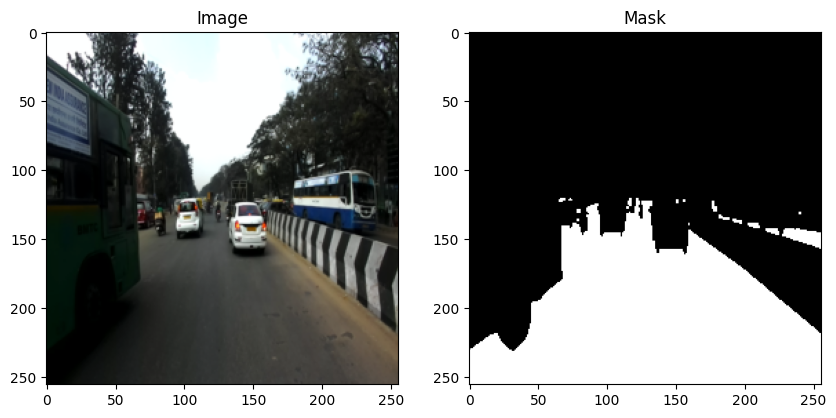

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of data
images, masks = next(iter(train_loader))

# Display the first sample
image = images[0].permute(1, 2, 0).numpy()
mask = masks[0].permute(1,2,0).numpy()

# Undo normalization for visualization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
image = std * image + mean
image = np.clip(image, 0, 1)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Image')

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

plt.show()

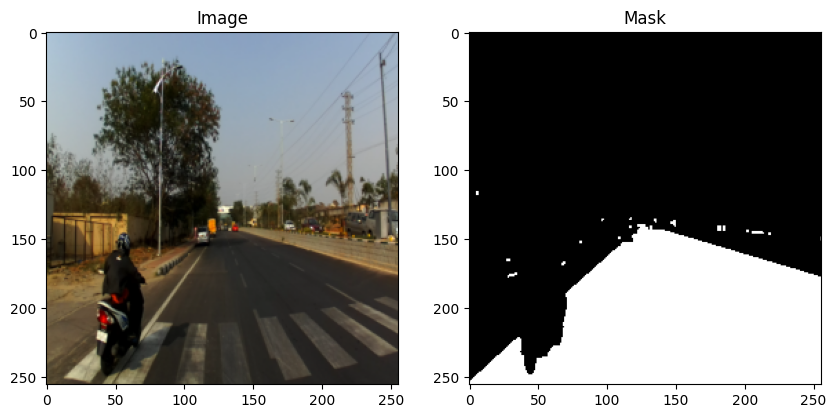

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of data
images, masks = next(iter(val_loader))

# Display the first sample
image = images[0].permute(1, 2, 0).numpy()
mask = masks[0].permute(1,2,0).numpy()

# Undo normalization for visualization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
image = std * image + mean
image = np.clip(image, 0, 1)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Image')

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

plt.show()

In [ ]:
image.shape

(256, 256, 3)

## Model Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


## U-Net Architecture

![image.png](attachment:0fda659f-e8c1-4933-9d48-f91681ef551b.png)

In [ ]:
# class DoubleConv(nn.Module):
#     def __init__(self,in_channels,out_channels):
#         super().__init__()
#         self.conv_op =nn.Sequential(
#         nn.Conv2d(in_channels,out_channels,kernel_size=3,padding=1),
#         nn.ReLU(inplace=True),
#         nn.Conv2d(in_channels,out_channels,kernel_size=3,padding=1),
#         nn.ReLU(inplace=True)
#         )

#     def forward(self,x):
#         ## the input feature maps in x which goes in the block con_op
#         ##the conv_op is created when DoubleConv is called
#         ##conv_op is a sequential model
#         return self.conv_op(x)

In [ ]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv_op = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),  # Corrected
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),  # Corrected
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
                ## the input feature maps in x which goes in the block con_op
        ##the conv_op is created when DoubleConv is called
        ##conv_op is a sequential model
        return self.conv_op(x)


In [ ]:
class DownSample(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = DoubleConv(in_channels, out_channels)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        down = self.conv(x)
        p = self.pool(down)

        return down, p

In [ ]:
class UpSample(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_channels, in_channels//2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
       x1 = self.up(x1)
       x = torch.cat([x1, x2], 1)
       return self.conv(x)

In [ ]:
## def init creates blocks
## forward uses this blocks
class UNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.down_convolution_1 = DownSample(in_channels, 64)
        self.down_convolution_2 = DownSample(64, 128)
        self.down_convolution_3 = DownSample(128, 256)
        self.down_convolution_4 = DownSample(256, 512)

        self.bottle_neck = DoubleConv(512, 1024)

        self.up_convolution_1 = UpSample(1024, 512)
        self.up_convolution_2 = UpSample(512, 256)
        self.up_convolution_3 = UpSample(256, 128)
        self.up_convolution_4 = UpSample(128, 64)

        self.out = nn.Conv2d(in_channels=64, out_channels=num_classes, kernel_size=1)

    def forward(self, x):
       down_1, p1 = self.down_convolution_1(x)
       down_2, p2 = self.down_convolution_2(p1)
       down_3, p3 = self.down_convolution_3(p2)
       down_4, p4 = self.down_convolution_4(p3)

       b = self.bottle_neck(p4)

       up_1 = self.up_convolution_1(b, down_4)
       up_2 = self.up_convolution_2(up_1, down_3)
       up_3 = self.up_convolution_3(up_2, down_2)
       up_4 = self.up_convolution_4(up_3, down_1)

       out = self.out(up_4)
       return out

In [ ]:
import torch.nn as nn

# For Binary Segmentation
criterion = nn.BCEWithLogitsLoss()

In [ ]:
import torch.optim as optim

model = UNet(in_channels=3, num_classes=1)  # For binary segmentation

# Move model to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'


In [ ]:
import torch
torch.cuda.empty_cache()


In [ ]:

# Some code with potential memory leaks

# Check GPU memory statistics
print(torch.cuda.memory_stats())

In [ ]:
EPOCHS=7

train_losses = []
val_losses = []

for epoch in tqdm(range(EPOCHS)):
        model.train()
        train_running_loss = 0

        for idx, img_mask in enumerate(tqdm(train_loader)):
            img = img_mask[0].float().to(device)
            mask = img_mask[1].float().to(device)

            y_pred = model(img)
            optimizer.zero_grad()

            loss = criterion(y_pred, mask)
            train_running_loss += loss.item()

            loss.backward()
            optimizer.step()
            torch.cuda.empty_cache()

        train_loss = train_running_loss / (idx + 1)
        train_losses.append(train_loss)

        model.eval()
        val_running_loss = 0
        with torch.no_grad():
            for idx, img_mask in enumerate(tqdm(val_loader)):
                img = img_mask[0].float().to(device)
                mask = img_mask[1].float().to(device)

                y_pred = model(img)
                loss = criterion(y_pred, mask)

                val_running_loss += loss.item()

            val_loss = val_running_loss / (idx + 1)
            val_losses.append(val_loss)

        print("-"*30)
        print(f"Train Loss EPOCH {epoch+1}: {train_loss:.4f}")
        print(f"Valid Loss EPOCH {epoch+1}: {val_loss:.4f}")
        print("-"*30)


torch.save(model.state_dict(),"/kaggle/working/model_weights.pth")

100%|██████████| 438/438 [04:31<00:00,  1.61it/s]

 14%|█▍        | 1/7 [05:05<30:31, 305.18s/it]

------------------------------
Train Loss EPOCH 1: 0.1230
Valid Loss EPOCH 1: 0.1296
------------------------------



100%|██████████| 438/438 [04:35<00:00,  1.59it/s]

 29%|██▊       | 2/7 [10:14<25:38, 307.76s/it]

------------------------------
Train Loss EPOCH 2: 0.1150
Valid Loss EPOCH 2: 0.1342
------------------------------



100%|██████████| 438/438 [04:33<00:00,  1.60it/s]

 43%|████▎     | 3/7 [15:21<20:29, 307.48s/it]

------------------------------
Train Loss EPOCH 3: 0.1098
Valid Loss EPOCH 3: 0.1510
------------------------------



100%|██████████| 438/438 [04:33<00:00,  1.60it/s]

 57%|█████▋    | 4/7 [20:30<15:23, 308.00s/it]

------------------------------
Train Loss EPOCH 4: 0.1038
Valid Loss EPOCH 4: 0.1301
------------------------------



100%|██████████| 438/438 [04:35<00:00,  1.59it/s]

 71%|███████▏  | 5/7 [25:39<10:16, 308.29s/it]

------------------------------
Train Loss EPOCH 5: 0.0978
Valid Loss EPOCH 5: 0.1182
------------------------------



100%|██████████| 438/438 [04:34<00:00,  1.60it/s]

 86%|████████▌ | 6/7 [30:47<05:08, 308.37s/it]

------------------------------
Train Loss EPOCH 6: 0.0931
Valid Loss EPOCH 6: 0.1171
------------------------------



100%|██████████| 438/438 [04:35<00:00,  1.59it/s]

100%|██████████| 7/7 [35:57<00:00, 308.18s/it]


------------------------------
Train Loss EPOCH 7: 0.0888
Valid Loss EPOCH 7: 0.1283
------------------------------


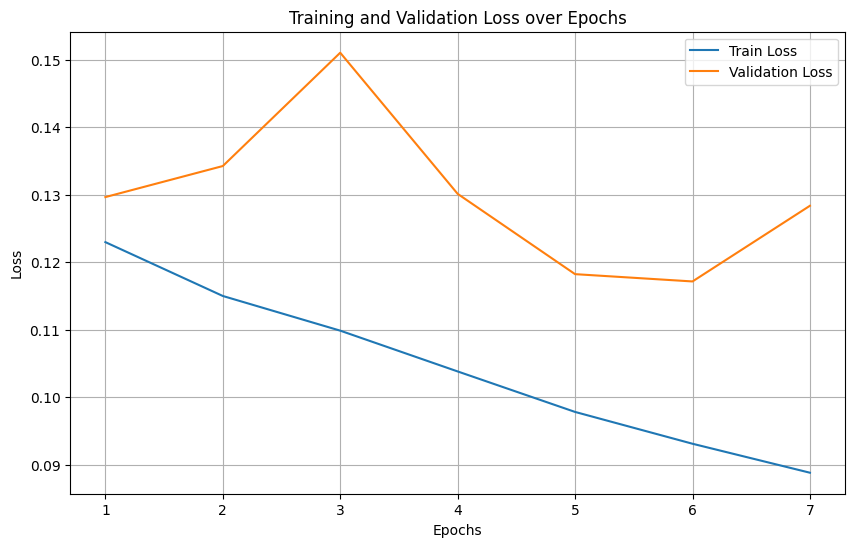

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS+1), train_losses, label="Train Loss")
plt.plot(range(1, EPOCHS+1), val_losses, label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from IPython.display import FileLink

# To create a clickable download link
FileLink(r'/kaggle/working/model_weights.pth')


/kaggle/working/model_weights.pth

In [ ]:
model.eval()
# Assuming you have a single image loaded (e.g., using PIL or OpenCV)
from PIL import Image
import torch
import torchvision.transforms as transforms

# Example transform: Resize and normalize image (update according to your needs)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to the size used in training
    transforms.ToTensor(),  # Convert image to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (mean, std should be the same as in training)
])

# Load image and apply the transformations
image = Image.open("/kaggle/input/iit-bhu-roads/1.jpeg")
input_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to GPU if available


In [ ]:
with torch.no_grad():  # Disable gradient calculation
    predicted_mask = model(input_image)


In [ ]:
predicted_mask = torch.sigmoid(predicted_mask)

# Thresholding to create a binary mask (e.g., using 0.5 as threshold)
predicted_mask = (predicted_mask > 0.5).float()

Text(0.5, 1.0, 'Predicted Mask')

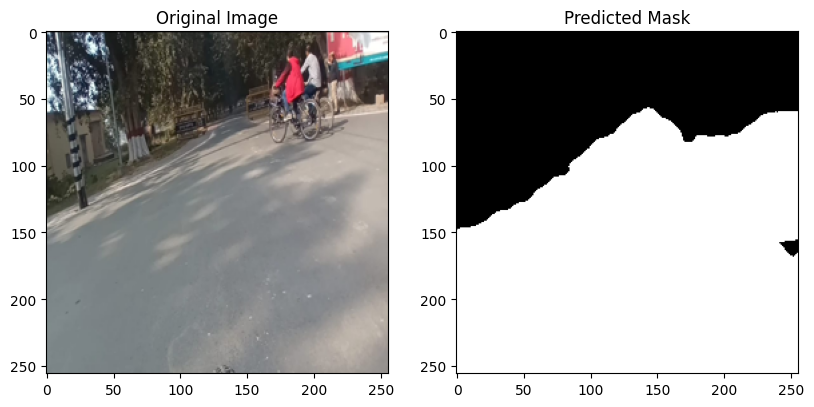

In [ ]:
predicted_mask_np = predicted_mask.squeeze().cpu().numpy()  # Remove batch and channel dimensions

# Plot the original image, predicted mask, and ground truth mask
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image.resize((256,256)))  # Original image
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(predicted_mask_np, cmap='gray')  # Predicted mask
plt.title("Predicted Mask")



## Inference
- Model prediction on IIT BHU Roads and Stock Images from Internet
- Calculating Inference time
- Median Inference time .0024 sec T4 GPU

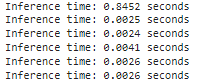



In [ ]:

from PIL import Image
import torch
import torchvision.transforms as transforms


transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to the size used in training
    transforms.ToTensor(),  # Convert image to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize (mean, std should be the same as in training)
])


def pred_class(image_link):
    image = Image.open(image_link)
    input_image = transform(image).unsqueeze(0).to(device)

    ## Time start
    start_time = time.time()


    with torch.no_grad():  # Disable gradient calculation
        predicted_mask = model(input_image)

    inference_time = time.time() - start_time

    predicted_mask = torch.sigmoid(predicted_mask)

# Thresholding to create a binary mask (e.g., using 0.5 as threshold)
    predicted_mask = (predicted_mask > 0.5).float()

    predicted_mask_np = predicted_mask.squeeze().cpu().numpy()  # Remove batch and channel dimensions

# Plot the original image, predicted mask, and ground truth mask
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image.resize((256,256)))  # Original image
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(predicted_mask_np, cmap='gray')  # Predicted mask
    plt.title("Predicted Mask")

    print(f"Inference time: {inference_time:.4f} seconds")

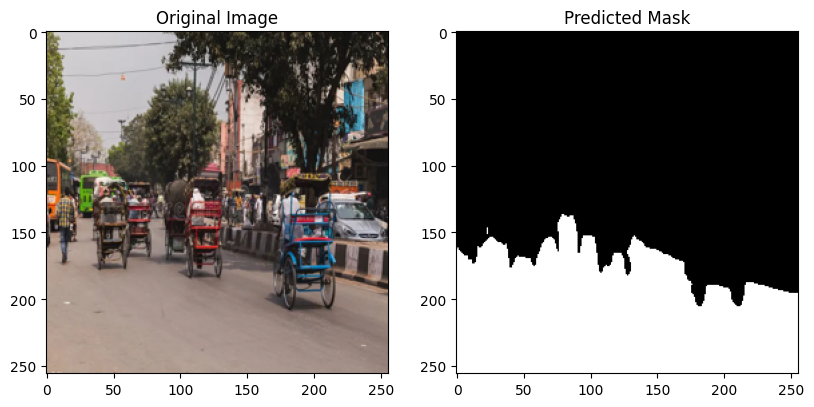

In [ ]:
model.eval()
pred_class('/kaggle/input/rrandom1234/roads-delhi-india-th-march-view-along-streets-day-lots-rickshaws-people-other-vehicles-can-be-69977917.jpg')

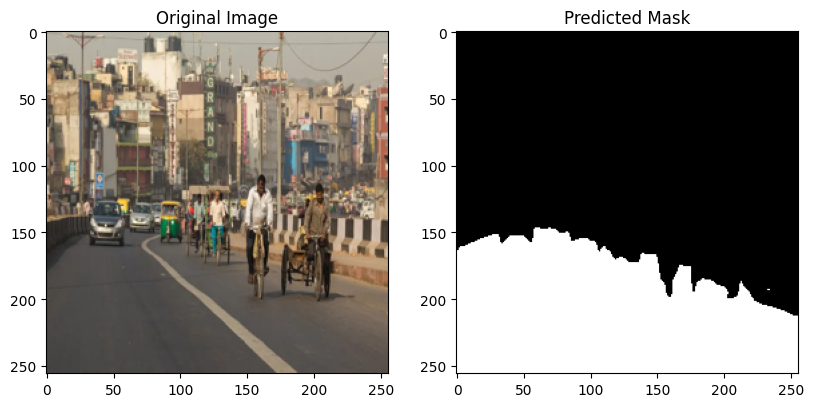

In [ ]:
model.eval()
pred_class('/kaggle/input/randommmmnn2/roads-central-delhi-india-th-march-view-along-day-showing-buildings-tuk-tuks-rickshaws-cars-people-69977821 (1).jpg')

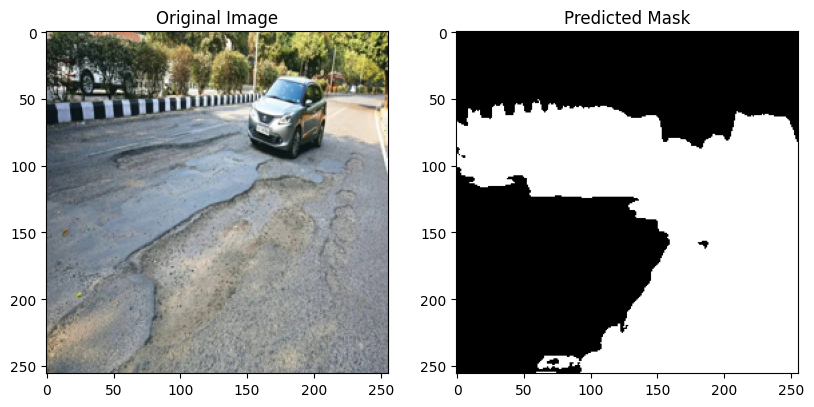

In [ ]:
model.eval()
pred_class('/kaggle/input/randommmmnn2/pothole-delhi.jpg')

Inference time: 0.8452 seconds
Inference time: 0.0025 seconds
Inference time: 0.0024 seconds
Inference time: 0.0041 seconds
Inference time: 0.0026 seconds
Inference time: 0.0026 seconds


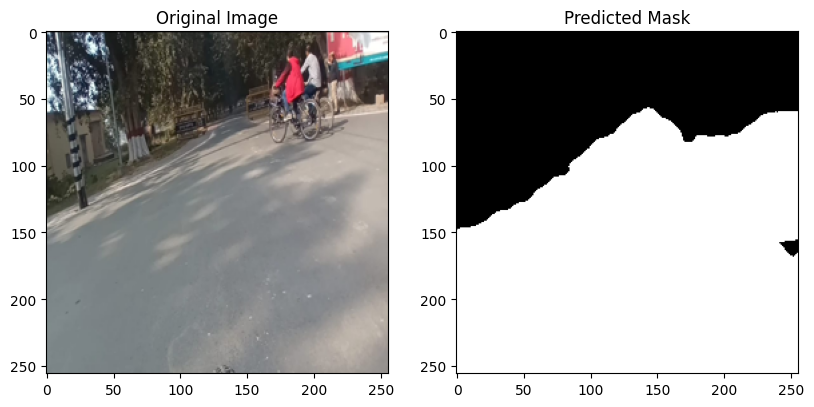

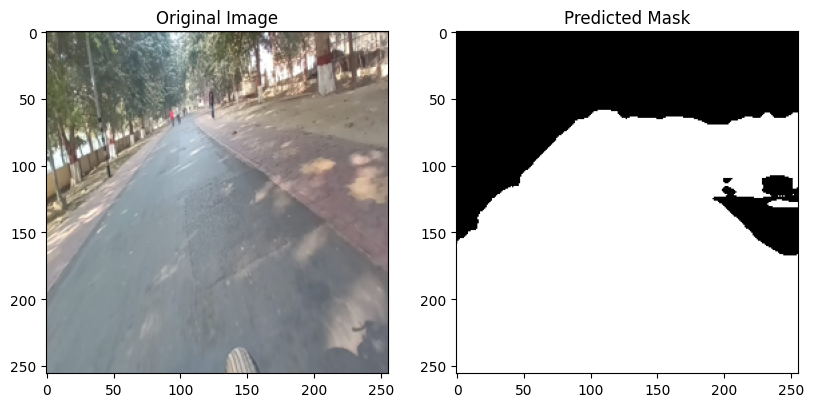

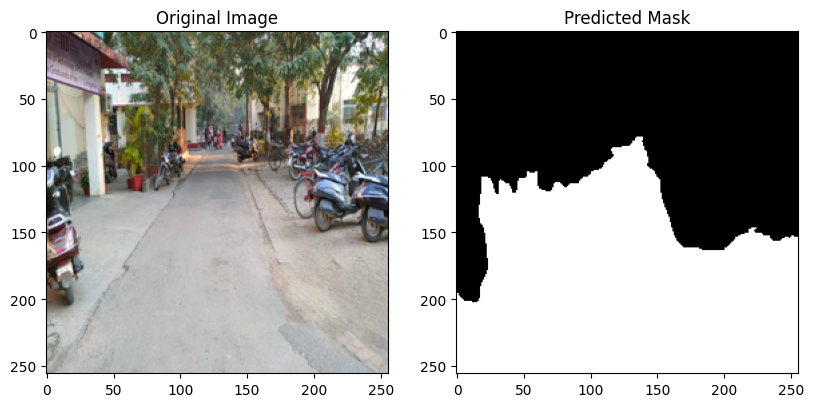

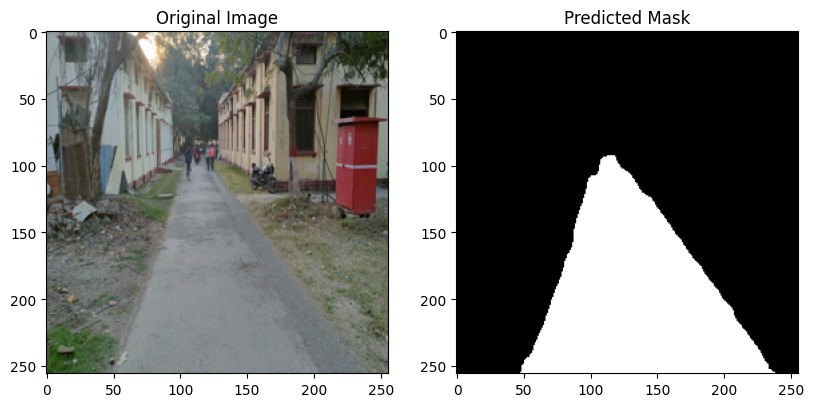

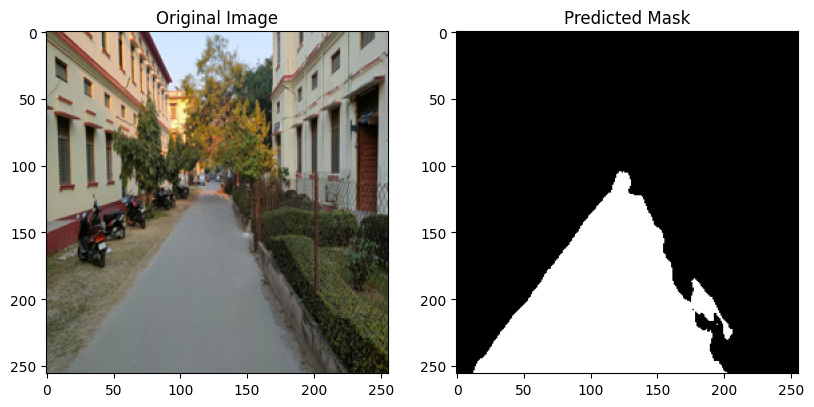

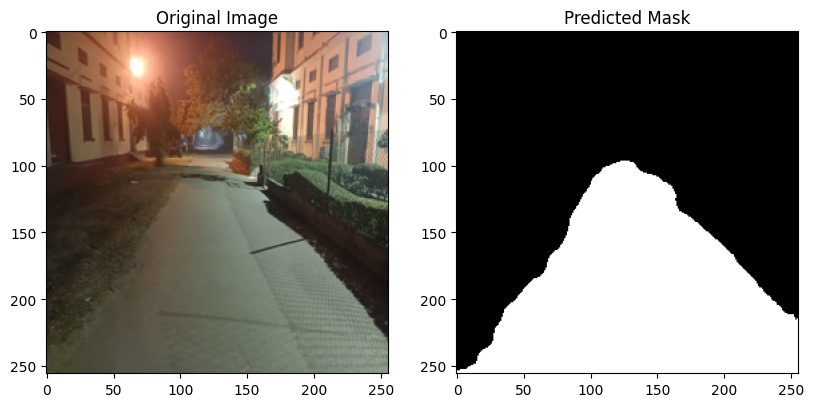

In [ ]:
model.eval()
pred_class('/content/1.jpeg')

model.eval()
pred_class('/content/2.jpeg')

model.eval()
pred_class('/content/P1.jpeg')

model.eval()
pred_class('/content/P2.jpeg')


model.eval()
pred_class('/content/P9.jpeg')


model.eval()
pred_class('/content/n1.jpeg')

In [ ]:
model_path='/content/model_weights.pth'

In [ ]:
model = UNet(in_channels=3, num_classes=1)  # For binary segmentation
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))

<ipython-input-11-3e5fd6b378fe>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))


<All keys matched successfully>

In [ ]:
model.eval()

UNet(
  (down_convolution_1): DownSample(
    (conv): DoubleConv(
      (conv_op): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU(inplace=True)
      )
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (down_convolution_2): DownSample(
    (conv): DoubleConv(
      (conv_op): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU(inplace=True)
      )
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (down_convolution_3): DownSample(
    (conv): DoubleConv(
      (conv_op): Sequential(
        (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), paddin

In [ ]:
import torch
import time
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

UNet(
  (down_convolution_1): DownSample(
    (conv): DoubleConv(
      (conv_op): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU(inplace=True)
      )
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (down_convolution_2): DownSample(
    (conv): DoubleConv(
      (conv_op): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
        (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU(inplace=True)
      )
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (down_convolution_3): DownSample(
    (conv): DoubleConv(
      (conv_op): Sequential(
        (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), paddin

In [ ]:
# for epoch in tqdm(range(EPOCHS), desc='Epochs'):
#     model.train()
#     train_running_loss = 0
#     for idx, img_mask in enumerate(tqdm(train_loader, desc='Training', leave=False)):
#         img = img_mask[0].float().to(device)  # [batch, 3, H, W]
#         mask = img_mask[1].float().to(device)  # [batch, 1, H, W]

#         print(f"Batch {idx+1}: Image shape: {img.shape}, Mask shape: {mask.shape}")

#         y_pred = model(img)  # Should be [batch, 1, H, W]
#         optimizer.zero_grad()

#         loss = criterion(y_pred, mask)
#         train_running_loss += loss.item()

#         loss.backward()
#         optimizer.step()

#     train_loss = train_running_loss / (idx + 1)

#     model.eval()
#     val_running_loss = 0
#     with torch.no_grad():
#         for idx, img_mask in enumerate(tqdm(val_loader, desc='Validation', leave=False)):
#             img = img_mask[0].float().to(device)
#             mask = img_mask[1].float().to(device)

#             print(f"Validation Batch {idx+1}: Image shape: {img.shape}, Mask shape: {mask.shape}")

#             y_pred = model(img)
#             loss = criterion(y_pred, mask)

#             val_running_loss += loss.item()

#         val_loss = val_running_loss / (idx + 1)

#     print("-"*30)
#     print(f"Train Loss EPOCH {epoch+1}: {train_loss:.4f}")
#     print(f"Valid Loss EPOCH {epoch+1}: {val_loss:.4f}")
#     print("-"*30)


In [ ]:
def validate(model, dataloader, criterion, device, epoch):
    model.eval()
    running_loss = 0.0

    with torch.no_grad():
        for batch_idx, (images, masks) in enumerate(tqdm(dataloader, desc=f"Validation Epoch {epoch+1}")):
            images = images.to(device)
            masks = masks.to(device).float()  # For BCEWithLogitsLoss

            outputs = model(images)
            if isinstance(outputs, dict):
                outputs = outputs['out']
            outputs = outputs.squeeze(1)  # [batch, H, W]
            loss = criterion(outputs, masks)

            running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(dataloader.dataset)

    return epoch_loss


In [ ]:
from tqdm import tqdm

# num_epochs = 25
# best_val_loss = float('inf')
# use_amp = True  # Use Automatic Mixed Precision (requires PyTorch >= 1.6)

# if use_amp and torch.cuda.is_available():
#     scaler = torch.cuda.amp.GradScaler()
# else:
#     scaler = None

# for epoch in range(num_epochs):
#     print(f"\nEpoch {epoch+1}/{num_epochs}")
#     print("-" * 10)

#     # Training
#     train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device, epoch, scaler)
#     print(f"Training Loss: {train_loss:.4f}")

#     # Validation
#     val_loss = validate(model, val_loader, criterion, device, epoch)
#     print(f"Validation Loss: {val_loss:.4f}")

#     # Scheduler Step
#     scheduler.step(val_loss)

#     # Checkpointing
#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         torch.save(model.state_dict(), 'best_unet_model.pth')
#         print("Best model saved!\n")


In [ ]:
# import torch
# import torch.nn as nn
# import torchvision.transforms as transforms

# class UNet(nn.Module):
#     def __init__(self, in_channels=3, out_channels=1):
#         super(UNet, self).__init__()

#         # Encoder
#         self.enc_conv1 = self.contracting_block(in_channels, 64)
#         self.enc_conv2 = self.contracting_block(64, 128)
#         self.enc_conv3 = self.contracting_block(128, 256)
#         self.enc_conv4 = self.contracting_block(256, 512)

#         # Bottleneck (No MaxPool)
#         self.bottleneck_conv1 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
#         self.bottleneck_bn1 = nn.BatchNorm2d(1024)
#         self.bottleneck_relu1 = nn.ReLU(inplace=True)
#         self.bottleneck_conv2 = nn.Conv2d(1024, 1024, kernel_size=3, padding=1)
#         self.bottleneck_bn2 = nn.BatchNorm2d(1024)
#         self.bottleneck_relu2 = nn.ReLU(inplace=True)

#         # Decoder
#         self.upconv4 = self.expansive_block(1024, 512)
#         self.upconv3 = self.expansive_block(512, 256)
#         self.upconv2 = self.expansive_block(256, 128)
#         self.upconv1 = self.expansive_block(128, 64)

#         # Final Convolution
#         self.final_conv = nn.Conv2d(128, out_channels, kernel_size=1)

#     def contracting_block(self, in_channels, out_channels):
#         block = nn.Sequential(
#             nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
#             nn.BatchNorm2d(out_channels),  # Optional: Improves training stability
#             nn.ReLU(inplace=True),
#             nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
#             nn.BatchNorm2d(out_channels),  # Optional
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces spatial dimensions by half
#         )
#         return block

#     def expansive_block(self, in_channels, out_channels):
#         block = nn.Sequential(
#             nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
#             nn.Conv2d(out_channels * 2, out_channels, kernel_size=3, padding=1),
#             nn.BatchNorm2d(out_channels),  # Optional
#             nn.ReLU(inplace=True),
#             nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
#             nn.BatchNorm2d(out_channels),  # Optional
#             nn.ReLU(inplace=True)
#         )
#         return block

#     def crop_and_concat(self, upsampled, bypass):
#         # Crop the bypass to match the size of upsampled
#         _, _, H, W = upsampled.size()
#         bypass = transforms.CenterCrop([H, W])(bypass)
#         return torch.cat((upsampled, bypass), 1)

#     def forward(self, x):
#         # Encoder path
#         enc1 = self.enc_conv1(x)  # [batch, 64, H/2, W/2]
#         enc2 = self.enc_conv2(enc1)  # [batch, 128, H/4, W/4]
#         enc3 = self.enc_conv3(enc2)  # [batch, 256, H/8, W/8]
#         enc4 = self.enc_conv4(enc3)  # [batch, 512, H/16, W/16]

#         # Bottleneck (No MaxPool)
#         bottleneck = self.bottleneck_conv1(enc4)
#         bottleneck = self.bottleneck_bn1(bottleneck)
#         bottleneck = self.bottleneck_relu1(bottleneck)
#         bottleneck = self.bottleneck_conv2(bottleneck)
#         bottleneck = self.bottleneck_bn2(bottleneck)
#         bottleneck = self.bottleneck_relu2(bottleneck)  # [batch, 1024, H/16, W/16]

#         # Decoder path
#         dec4 = self.upconv4(bottleneck)  # [batch, 512, H/8, W/8]
#         dec4 = self.crop_and_concat(dec4, enc4)  # [batch, 512 + 512, H/8, W/8]

#         dec3 = self.upconv3(dec4)  # [batch, 256, H/4, W/4]
#         dec3 = self.crop_and_concat(dec3, enc3)  # [batch, 256 + 256, H/4, W/4]

#         dec2 = self.upconv2(dec3)  # [batch, 128, H/2, W/2]
#         dec2 = self.crop_and_concat(dec2, enc2)  # [batch, 128 + 128, H/2, W/2]

#         dec1 = self.upconv1(dec2)  # [batch, 64, H, W]
#         dec1 = self.crop_and_concat(dec1, enc1)  # [batch, 64 + 64, H, W]

#         # Final Convolution
#         output = self.final_conv(dec1)  # [batch, 1, H, W]

#         return output


In [ ]:
import torch

# Check if CUDA (GPU) is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)  # This will print 'cuda' if GPU is available, otherwise 'cpu'


In [ ]:
# Install segmentation_models_pytorch
!pip install -U segmentation-models-pytorch


In [ ]:
import os
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision.transforms as transforms
import torchvision.transforms.functional as TF

from torchvision import models

from tqdm import tqdm  # For progress bars


In [ ]:
# import torch
# import torch.nn as nn
# from torchvision import models
# from torchvision.models.segmentation.deeplabv3 import DeepLabV3_ResNet101_Weights

# # Define device
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f'Using device: {device}')

# # Load the pretrained DeepLabv3 model with ResNet101 backbone
# weights = DeepLabV3_ResNet101_Weights.DEFAULT  # You can choose other weights if available
# model = models.segmentation.deeplabv3_resnet101(weights=weights)

# # Modify the final classifier for binary segmentation (road vs. non-road)
# # The original classifier has 21 output classes (for PASCAL VOC)
# model.classifier[4] = nn.Conv2d(256, 1, kernel_size=(1, 1), stride=(1, 1))

# # Move the model to the device
# model = model.to(device)



In [ ]:
print(DeepLabV3_ResNet101_Weights)


In [ ]:
import torchvision.transforms as transforms
model = UNet(in_channels=3, out_channels=1).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',
                                                 factor=0.5, patience=3, verbose=True)


In [ ]:
# num_epochs = 20
# best_loss = float('inf')

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0

#     for images, masks in train_loader:
#         images = images.to(device)
#         masks = masks.to(device).float()  # Ensure masks are float tensors

#         optimizer.zero_grad()
#         outputs = model(images)
#         outputs = outputs.squeeze(1)
#         loss = criterion(outputs, masks)

#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * images.size(0)

#     epoch_loss = running_loss / len(train_dataset)

#     # Validation
#     val_loss = evaluate(model, val_loader, criterion)
#     scheduler.step(val_loss)

#     print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}, Validation Loss: {val_loss:.4f}')

#     if val_loss < best_loss:
#         best_loss = val_loss
#         torch.save(model.state_dict(), 'best_model.pth')